In [2]:
pip install catboost


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 640.0 kB/s eta 0:02:38
   ---------------------------------------- 0.1/101.1 MB 1.5 MB/s eta 0:01:10
   ---------------------------------------- 0.3/101.1 MB 2.8 MB/s eta 0:00:36
   ---------------------------------------- 0.6/101.1 MB 3.7 MB/s eta 0:00:28
   ---------------------------------------- 0.8/101.1 MB 4.1 MB/s eta 0:00:25
   ---------------------------------------- 1.1/101.1 MB 4.3 MB/s eta 0:00:24
    --------------------------------------- 1.4/101.1 MB 4.8 MB/s eta 0:00:21
    --------------------------------------- 1.8/101.1 MB 5.1 MB/s eta 0:00:20
    --------------------------------------- 2.0/101.1 MB 5.2 MB/s eta 0:00:20
    --------------------------------------- 2.4/101.1 MB 5.4 MB/s eta 0:00:19
   - -------------------------------------- 2.7/101.1 MB 5.6 MB/s eta

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report


In [4]:
# 시스템에 설치된 한글 폰트 설정
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

### Feature

In [15]:
feature = pd.read_excel('C:/Users/SAMSUNG/Documents/vscode/2024/ML/프로젝트/data/features_except_GDP4.xlsx')
### 날짜 datatime 형식으로 변환
feature['날짜'] = pd.to_datetime(feature['날짜'])

### 피쳐 정보 확인
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   날짜                 129 non-null    datetime64[ns]
 1   경상수지               129 non-null    float64       
 2   실업률                129 non-null    float64       
 3   고용률                129 non-null    float64       
 4   WTI유가              129 non-null    float64       
 5   건설기성액(십억원)         129 non-null    float64       
 6   국내설비투자지수           129 non-null    float64       
 7   국내소매판매액지수          129 non-null    float64       
 8   국내전산업생산지수          129 non-null    float64       
 9   달러인덱스              129 non-null    float64       
 10  미국ISM(제조업물가지수)     129 non-null    float64       
 11  미국PMI(제조업구매담장자지수)  129 non-null    float64       
 12  미국건설지출             129 non-null    float64       
 13  미국취업자수증감(만명)       129 non-null    float64       
 14  미국생산자물가지수 

In [16]:
feature.tail()

,날짜,경상수지,실업률,고용률,WTI유가,건설기성액(십억원),국내설비투자지수,국내소매판매액지수,국내전산업생산지수,달러인덱스,...,미국건설지출,미국취업자수증감(만명),미국생산자물가지수,종합주택매매가격지수,소비자물가지수,소비자심리지수(CCSI),실업급여지급건수(월),전체임금총액(원),3년국채기준금리차,label
124,2023-08-01,0.315710,-0.107143,0.001600,0.0224,-0.012222,0.039286,0.004859,0.018083,0.019296,...,-0.444444,0.141304,0.023057,-0.000733,0.0012,-0.000967,0.072584,-0.0556,0.644487,0
125,2023-09-01,0.121935,0.040000,0.001597,0.0856,0.005305,0.067869,-0.009671,0.007993,0.021508,...,0.400000,0.171429,0.005078,0.001068,0.0089,-0.033882,-0.089923,0.1532,0.502278,0
126,2023-10-01,0.224793,-0.038462,0.000000,-0.1076,0.015715,-0.018504,0.007812,-0.007048,0.006417,...,-0.285714,-0.329268,-0.012874,0.002197,0.0049,-0.016032,-0.039182,-0.1213,0.554306,0
127,2023-11-01,-0.476902,0.120000,-0.001595,-0.0625,0.004134,-0.020492,-0.000969,0.002662,-0.028790,...,-0.200000,0.103030,-0.010441,0.001065,0.0038,-0.009165,-0.057692,-0.0205,-0.488786,0
128,2023-12-01,0.905724,0.142857,0.000000,-0.0567,-0.004625,0.022594,0.004850,0.003540,-0.023195,...,0.500000,0.593407,-0.013220,0.002242,-0.0052,0.024666,-0.091186,0.1935,-1.554236,0


In [17]:
feature['label'].value_counts()

label
0    70
1    59
Name: count, dtype: int64

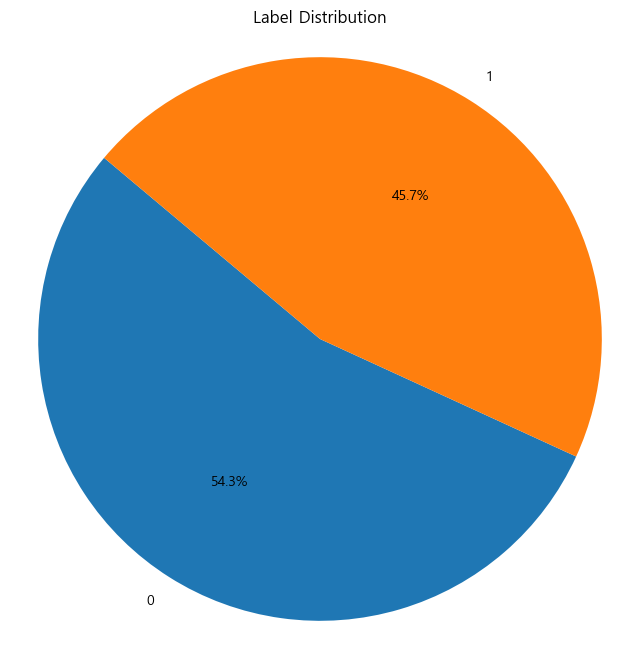

In [18]:
# 라벨링 분포 계산
label_counts = feature['label'].value_counts()

# 원형 그래프로 시각화
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Label Distribution')
plt.axis('equal')  # 원형 그래프를 원으로 만듭니다.
plt.show()


### Feature Selection

1. 기본 성능 검증

In [19]:
# 날짜 기준으로 데이터 분할
train_data = feature[feature['날짜'] <= pd.Timestamp('2020-12-31')]
test_data = feature[feature['날짜'] >= pd.Timestamp('2021-01-01')]

# 타겟 변수와 피처 분리
X_train = train_data.drop(['날짜', 'label'], axis=1)
y_train = train_data['label']
X_test = test_data.drop(['날짜', 'label'], axis=1)
y_test = test_data['label']


### 모델들 초기화
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
lgb = LGBMClassifier(random_state=42)
cat = CatBoostClassifier(random_state=42, verbose=0)

### 모델 학습
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)
cat.fit(X_train, y_train)

### 모델 예측
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_lgb = lgb.predict(X_test)
y_pred_cat = cat.predict(X_test)

[LightGBM] [Info] Number of positive: 38, number of negative: 55
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 612
[LightGBM] [Info] Number of data points in the train set: 93, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.408602 -> initscore=-0.369747
[LightGBM] [Info] Start training from score -0.369747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [10]:
train_data['label'].value_counts()

label
0    55
1    38
Name: count, dtype: int64

In [11]:
test_data['label'].value_counts()

label
1    21
0    15
Name: count, dtype: int64

(1) DecisionTreeClassifier

In [12]:
print("DecisionTreeClassifier 성능:")
print(f"정확도: {accuracy_score(y_test, y_pred_dt):.2f}")
print(f"정밀도: {precision_score(y_test, y_pred_dt, average='macro'):.2f}")
print(f"재현율: {recall_score(y_test, y_pred_dt, average='macro'):.2f}")
print(f"F1 점수: {f1_score(y_test, y_pred_dt, average='macro'):.2f}")
print(classification_report(y_test, y_pred_dt))
feature_importances_dt = pd.DataFrame(dt.feature_importances_,
                                      index = X_train.columns,
                                      columns=['importance']).sort_values('importance', ascending=False)

feature_importances_dt.reset_index(inplace=True)
feature_importances_dt.columns = ['feature', 'importance']
feature_importances_dt

DecisionTreeClassifier 성능:
정확도: 0.50
정밀도: 0.46
재현율: 0.47
F1 점수: 0.46
              precision    recall  f1-score   support

           0       0.36      0.27      0.31        15
           1       0.56      0.67      0.61        21

    accuracy                           0.50        36
   macro avg       0.46      0.47      0.46        36
weighted avg       0.48      0.50      0.48        36



,feature,importance
0,종합주택매매가격지수,0.289807
1,미국PMI(제조업구매담장자지수),0.156110
2,미국취업자수증감(만명),0.106794
3,소비자물가지수,0.102687
4,건설기성액(십억원),0.092054
5,미국건설지출,0.075226
6,미국생산자물가지수,0.063568
7,청년실업율(15~29세),0.037512
8,실업급여지급건수(월),0.035167
9,전체임금총액(원),0.022249


(2) RandomForestClassifier

In [13]:
print("RandomForestClassifier 성능:")
print(f"정확도: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"정밀도: {precision_score(y_test, y_pred_rf, average='macro'):.2f}")
print(f"재현율: {recall_score(y_test, y_pred_rf, average='macro'):.2f}")
print(f"F1 점수: {f1_score(y_test, y_pred_rf, average='macro'):.2f}")
print(classification_report(y_test, y_pred_rf))
feature_importances_rf = pd.DataFrame(rf.feature_importances_,
                                      index = X_train.columns,
                                      columns=['importance']).sort_values('importance', ascending=False)

feature_importances_rf.reset_index(inplace=True)
feature_importances_rf.columns = ['feature', 'importance']
feature_importances_rf

RandomForestClassifier 성능:
정확도: 0.47
정밀도: 0.47
재현율: 0.47
F1 점수: 0.47
              precision    recall  f1-score   support

           0       0.39      0.47      0.42        15
           1       0.56      0.48      0.51        21

    accuracy                           0.47        36
   macro avg       0.47      0.47      0.47        36
weighted avg       0.49      0.47      0.48        36



,feature,importance
0,종합주택매매가격지수,0.116560
1,청년실업율(15~29세),0.082591
2,미국비농업고용자수,0.066331
3,3년국채기준금리차,0.049720
4,소비자심리지수(CCSI),0.046691
5,미국PMI(제조업구매담장자지수),0.044308
6,미국건설지출,0.044212
7,WTI유가,0.044121
8,건설기성액(십억원),0.042951
9,실업률,0.041975


(3) XGBClassifier

In [63]:
print("XGBClassifier 성능:")
print(f"정확도: {accuracy_score(y_test, y_pred_xgb):.2f}")
print(f"정밀도: {precision_score(y_test, y_pred_xgb, average='macro'):.2f}")
print(f"재현율: {recall_score(y_test, y_pred_xgb, average='macro'):.2f}")
print(f"F1 점수: {f1_score(y_test, y_pred_xgb, average='macro'):.2f}")
print(classification_report(y_test, y_pred_xgb))
feature_importances_xgb = pd.DataFrame(xgb.feature_importances_,
                                      index = X_train.columns,
                                      columns=['importance']).sort_values('importance', ascending=False)
feature_importances_xgb.reset_index(inplace=True)
feature_importances_xgb.columns = ['feature', 'importance']
feature_importances_xgb

XGBClassifier 성능:
정확도: 0.50
정밀도: 0.40
재현율: 0.44
F1 점수: 0.39
              precision    recall  f1-score   support

           0       0.25      0.10      0.14        10
           1       0.55      0.79      0.65        14

    accuracy                           0.50        24
   macro avg       0.40      0.44      0.39        24
weighted avg       0.43      0.50      0.44        24



,feature,importance
0,종합주택매매가격지수,0.123161
1,미국건설지출,0.118087
2,실업률,0.073401
3,미국생산자물가지수,0.070602
4,국내전산업생산지수,0.068573
5,미국PMI(제조업구매담장자지수),0.067214
6,국내소매판매액지수,0.065121
7,실업급여지급건수(월),0.063404
8,3년국채기준금리차,0.061428
9,WTI유가,0.040390


(4) LGBMClassifier

In [64]:
y_pred_rf = lgb.predict(X_test)
print("LGBMClassifier 성능:")
print(f"정확도: {accuracy_score(y_test, y_pred_lgb):.2f}")
print(f"정밀도: {precision_score(y_test, y_pred_lgb, average='macro'):.2f}")
print(f"재현율: {recall_score(y_test, y_pred_lgb, average='macro'):.2f}")
print(f"F1 점수: {f1_score(y_test, y_pred_lgb, average='macro'):.2f}")
print(classification_report(y_test, y_pred_lgb))
feature_importances_lgb = pd.DataFrame(lgb.feature_importances_,
                                      index = X_train.columns,
                                      columns=['importance']).sort_values('importance', ascending=False)
pd.DataFrame(feature_importances_lgb)

LGBMClassifier 성능:
정확도: 0.54
정밀도: 0.55
재현율: 0.55
F1 점수: 0.54
              precision    recall  f1-score   support

           0       0.46      0.60      0.52        10
           1       0.64      0.50      0.56        14

    accuracy                           0.54        24
   macro avg       0.55      0.55      0.54        24
weighted avg       0.56      0.54      0.54        24



,importance
건설기성액(십억원),32
종합주택매매가격지수,22
미국ISM(제조업물가지수),21
국내설비투자지수,19
WTI유가,15
달러인덱스,15
3년국채기준금리차,14
고용률,14
미국건설지출,13
미국PMI(제조업구매담장자지수),10


(5) CatBoostClassifier

In [65]:
print("CatBoostClassifier 성능:")
print(f"정확도: {accuracy_score(y_test, y_pred_cat):.2f}")
print(f"정밀도: {precision_score(y_test, y_pred_cat, average='macro'):.2f}")
print(f"재현율: {recall_score(y_test, y_pred_cat, average='macro'):.2f}")
print(f"F1 점수: {f1_score(y_test, y_pred_cat, average='macro'):.2f}")
print(classification_report(y_test, y_pred_cat))
feature_importances_cat = pd.DataFrame(cat.feature_importances_,
                                      index = X_train.columns,
                                      columns=['importance']).sort_values('importance', ascending=False)
pd.DataFrame(feature_importances_cat)

CatBoostClassifier 성능:
정확도: 0.58
정밀도: 0.55
재현율: 0.53
F1 점수: 0.50
              precision    recall  f1-score   support

           0       0.50      0.20      0.29        10
           1       0.60      0.86      0.71        14

    accuracy                           0.58        24
   macro avg       0.55      0.53      0.50        24
weighted avg       0.56      0.58      0.53        24



,importance
종합주택매매가격지수,14.473679
미국건설지출,8.218111
건설기성액(십억원),6.413012
3년국채기준금리차,6.356646
실업률,4.787335
미국취업자수증감(만명),4.692776
미국PMI(제조업구매담장자지수),4.624624
국내설비투자지수,4.620086
전체임금총액(원),4.520495
미국ISM(제조업물가지수),4.383032


Text(0.5, 1.0, 'Feature Importance in Linear Regression Model')

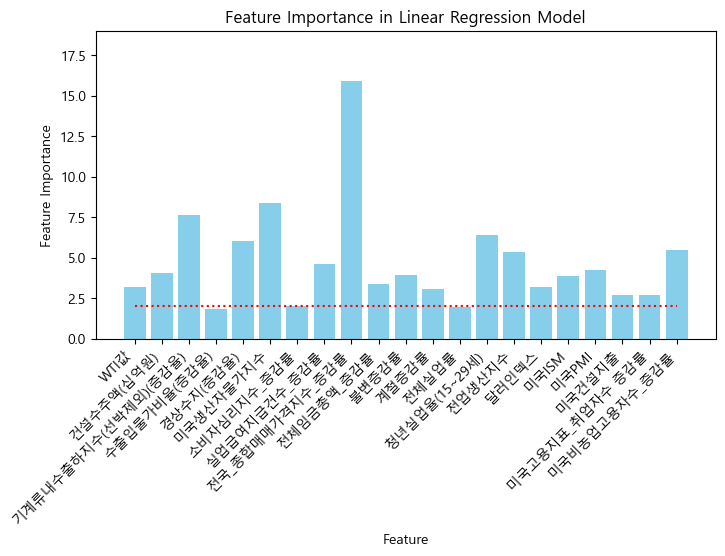

In [ ]:
low_importance_criteria = 2 
ylimit_val = 19

# 피처 중요도를 수직 바 그래프로 시각화
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(X.columns, cat.feature_importances_, color='skyblue')
ax.hlines(low_importance_criteria, 0, len(X.columns)-1 , colors='r', linestyles='dotted', label='low criteria')

ax.set_xticks(range(len(X.columns)))  # X축에 대한 틱 위치 설정
ax.set_xticklabels(X.columns, rotation=45, ha="right")  # X축에 대한 레이블 설정
ax.set_xlabel("Feature")  # X축 레이블
ax.set_ylabel("Feature Importance")  # Y축 레이블
ax.set_ylim(0, ylimit_val)  # Y축 범위
ax.set_title("Feature Importance in Linear Regression Model")  # 그래프 제목 설정

2. 특정 값 이하의 특성 중요도 갖는 피처 제거

#### 모델링

### Feature Selection
1. Reculsive Feature Elimination
2. Select From model - random forest
3. Select from model - LogisticRegression
4. Permutation Importance

1. Reculsive Feature Elimination
- 모든 feature들로부터 feature를 하나하나 제거하면서 원하는 개수의 feature가 남을 때까지 반복